In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('shopping_data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
sp_df=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
sp_df.columns=['Age','Income','Spending']

### Visualize the data  ->  Age Vs. Annual Income

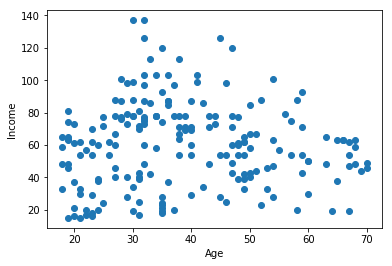

In [8]:
# importing ploting libraries
import matplotlib.pyplot as plt 
plt.scatter(sp_df.Age, sp_df.Income )
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

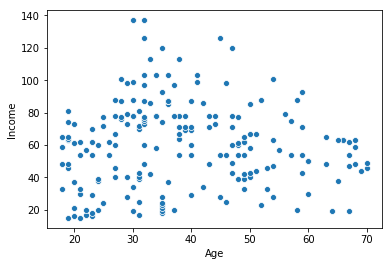

In [9]:
import seaborn as sns
sns.scatterplot(sp_df.Age, sp_df.Income )

### Visualize the data  ->  Age Vs. Spending Score

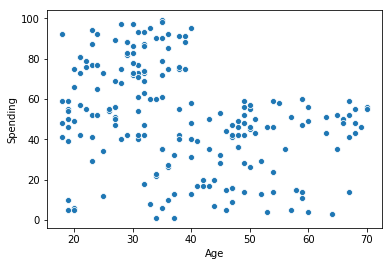

In [10]:
sns.scatterplot(sp_df.Age, sp_df.Spending )

### Visualize the data  ->  Annual Income Vs. Spending Score

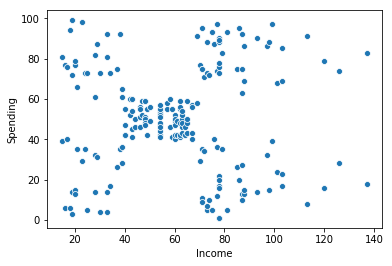

In [11]:
sns.scatterplot(sp_df.Income, sp_df.Spending )

### Building a Dendrogram using Annual Income and Spending Score columns

In [27]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.stats import zscore
sp_df=sp_df.apply(zscore)
sp_df_1=sp_df.apply(zscore)
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(sp_df)
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [28]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [29]:
Z = linkage(sp_df, 'average')
c, coph_dists = cophenet(Z , pdist(sp_df))
c

0.8059973664052003

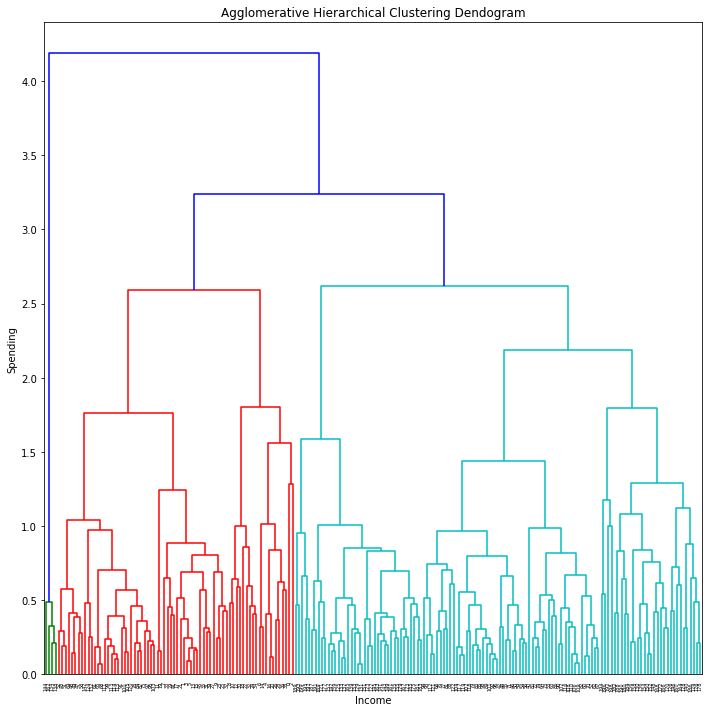

In [30]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Income')
plt.ylabel('Spending')
dendrogram(Z)
plt.tight_layout()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000124A66E64E0>,
      dtype=object)

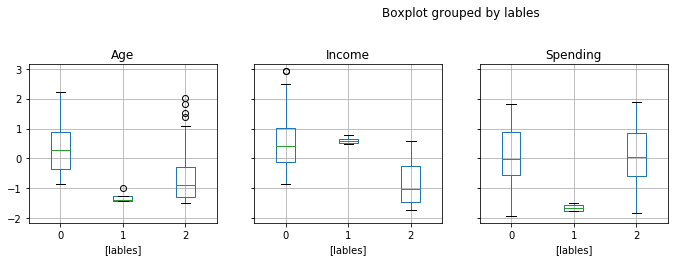

In [31]:
sp_df['lables']=model.labels_
sp_df.boxplot(by='lables',layout=(3,4),figsize=(15,10))

How many clusters to take?

### Agglomerative Clustering -> Get 5 clusters

In [32]:
sp_df=df[['Annual Income (k$)','Spending Score (1-100)']]
sp_df.columns=['Income','Spending']
sp_df_1=sp_df.apply(zscore)
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
model.fit(sp_df_1)
model.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4,
       0, 4], dtype=int64)

In [ ]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [33]:
Z = linkage(sp_df_1, 'average')
c, coph_dists = cophenet(Z , pdist(sp_df_1))
c

0.7217277784319628

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000124A7C681D0>,
      dtype=object)

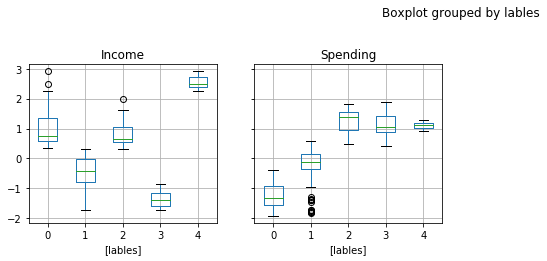

In [41]:
sp_df_1['lables']=model.labels_
sp_df_1.boxplot(by='lables',layout=(3,4),figsize=(15,10))

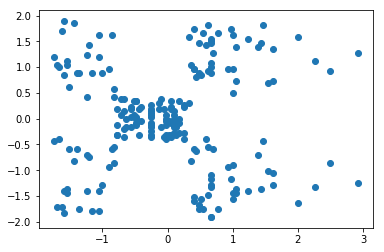

In [47]:
#sns.scatterplot(by='lables',layout=(3,4),figsize=(15,10),data=sp_df_1)
plt.scatter(sp_df_1['Income'],sp_df_1['Spending'])